# ウェブサービスにおけるデータサイエンス実践 第2回

## SQLを用いたデータ解析 (2/3)

## 今日の目的

- JOINによる複数のテーブルを組み合わせた分析
- WITH文による一時テーブル作成

In [1]:
%matplotlib inline
import sqlite3

import pandas
import matplotlib.pyplot as pyplot

In [2]:
sqlite_conn = sqlite3.connect('./waseda.db')

## JOINについて

2つのテーブルを結合できる。

結合方法には、
- inner join
- outer join (left or right)
があるが、デフォルトではinner joinである


```
SELECT
    ...
FROM
    tableA
JOIN
    tableB
ON
    tableA.column = tableB.column
WHERE
     .....
```

In [3]:
# ひとまず動かす

sql = """
SELECT
    *
FROM
    users
JOIN
    clicks
ON
    users.user_id = clicks.user_id
LIMIT 30
"""

pandas.read_sql(sql, sqlite_conn)

,index,user_id,gender_id,created_at,index,user_id,article_id,created_at
0,1,4684,0.0,2019-03-18 15:33:28,168450,4684,17822,2019-03-26 21:32:24
1,2,1731,1.0,2019-03-22 08:08:10,139618,1731,16320,2019-03-22 08:14:14
2,2,1731,1.0,2019-03-22 08:08:10,139619,1731,25290,2019-03-22 08:08:36
3,2,1731,1.0,2019-03-22 08:08:10,139620,1731,23341,2019-03-22 08:09:59
4,5,6340,NaN,2019-03-21 03:27:54,105537,6340,20919,2019-03-21 03:28:46
5,5,6340,NaN,2019-03-21 03:27:54,105538,6340,14217,2019-03-21 03:28:38
6,5,6340,NaN,2019-03-21 03:27:54,105539,6340,25194,2019-03-27 01:15:04
7,5,6340,NaN,2019-03-21 03:27:54,105540,6340,625,2019-03-27 01:12:40
8,5,6340,NaN,2019-03-21 03:27:54,105541,6340,1145,2019-03-27 01:14:55
9,5,6340,NaN,2019-03-21 03:27:54,105542,6340,25766,2019-03-27 01:14:45


In [4]:
# 性別のクリック数

sql = """
SELECT
    gender_id,
    COUNT(article_id)
FROM
    users
JOIN
    clicks
ON
    users.user_id = clicks.user_id
GROUP BY gender_id
"""

pandas.read_sql(sql, sqlite_conn)

,gender_id,COUNT(article_id)
0,NaN,44323
1,0.0,70775
2,1.0,54291


In [5]:
# 登録日ごとのクリック数を求めてみよう

In [6]:
# 日別の、性別ごとのクリック数
sql = """
SELECT
    DATE(clicks.created_at) as date,
    gender_id,
    COUNT(*) as num_clicks
FROM
    users
JOIN
    clicks
ON
    users.user_id = clicks.user_id
GROUP BY
    DATE(clicks.created_at),
    gender_id
"""

pandas.read_sql(sql, sqlite_conn)

,date,gender_id,num_clicks
0,2019-03-18,NaN,631
1,2019-03-18,0.0,1917
2,2019-03-18,1.0,906
3,2019-03-19,NaN,1587
4,2019-03-19,0.0,2636
5,2019-03-19,1.0,2039
6,2019-03-20,NaN,2168
7,2019-03-20,0.0,3743
8,2019-03-20,1.0,3226
9,2019-03-21,NaN,2789


In [7]:
_ = pandas.read_sql(sql, sqlite_conn)
_.pivot(index='date', columns='gender_id', values='num_clicks', )

gender_id,nan,0.0,1.0
date,,,
2019-03-18,631.0,1917.0,906.0
2019-03-19,1587.0,2636.0,2039.0
2019-03-20,2168.0,3743.0,3226.0
2019-03-21,2789.0,5157.0,3974.0
2019-03-22,3076.0,4833.0,3720.0
2019-03-23,3534.0,5548.0,5079.0
2019-03-24,4525.0,7041.0,5438.0
2019-03-25,4035.0,6943.0,4844.0
2019-03-26,3954.0,6115.0,4739.0


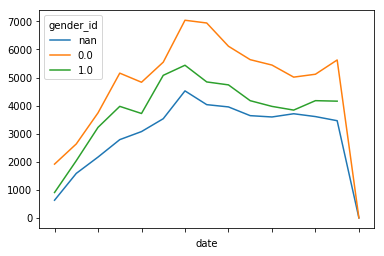

In [8]:
_ = pandas.read_sql(sql, sqlite_conn)
_.pivot(index='date', columns='gender_id', values='num_clicks', ).plot()

In [9]:
# 日別の、登録日ごとのクリック数を求めて可視化してみよう

## WITH文


一時テーブルを使って処理する

```
WITH query_name1 as (
SELECT
...
),
query_name2 as (
....
), ....

SELECT
....
```

In [10]:
# 前回の復習
# クリック数の分布

sql = """
SELECT
    num_clicks,
    COUNT(user_id)
FROM (
    SELECT
        user_id,
        COUNT(article_id) as num_clicks
    FROM
        clicks
    GROUP BY user_id
)
GROUP BY 
    num_clicks
"""
pandas.read_sql(sql, sqlite_conn)

,num_clicks,COUNT(user_id)
0,1,1311
1,2,759
2,3,542
3,4,406
4,5,344
5,6,300
6,7,220
7,8,226
8,9,177
9,10,140


In [11]:
# WITH文をつかって書き換える
# ユーザのクリック数の分布

sql = """
WITH user_num_clicks as (
    SELECT
        user_id,
        COUNT(article_id) as num_clicks
    FROM
        clicks
    GROUP BY user_id
)
SELECT
    num_clicks,
    COUNT(user_id)
FROM 
    user_num_clicks
GROUP BY 
    num_clicks
"""
pandas.read_sql(sql, sqlite_conn)

,num_clicks,COUNT(user_id)
0,1,1311
1,2,759
2,3,542
3,4,406
4,5,344
5,6,300
6,7,220
7,8,226
8,9,177
9,10,140


In [12]:
# WITH文を使って、記事のクリック数の分布を計算してみよう

In [13]:
# WITHとJOINを組み合わせる
# click_uuとclick_numを計算し、ひとりあたりのクリック数の推移をみる

sql = """
WITH click_uu as (
    SELECT
        DATE(created_at) as date,
        COUNT(DISTINCT user_id) as uu
    FROM
        clicks
    GROUP BY
        DATE(created_at)
),
click_num as (
    SELECT
        DATE(created_at) as date,
        COUNT(user_id) as num
    FROM
        clicks
    GROUP BY
        DATE(created_at) 
)
SELECT
    click_num.date,
    click_uu.uu,
    click_num.num,
    1.0 * click_num.num / click_uu.uu as click_per_uu
FROM
    click_num
JOIN
    click_uu
ON
    click_num.date = click_uu.date
"""

pandas.read_sql(sql, sqlite_conn)

,date,uu,num,click_per_uu
0,2019-03-18,644,3454,5.363354
1,2019-03-19,1158,6262,5.407599
2,2019-03-20,1371,9137,6.664478
3,2019-03-21,1798,11920,6.629588
4,2019-03-22,1663,11629,6.992784
5,2019-03-23,2107,14161,6.720930
6,2019-03-24,2295,17004,7.409150
7,2019-03-25,2003,15822,7.899151
8,2019-03-26,1737,14808,8.525043
9,2019-03-27,1724,13456,7.805104


In [14]:
# 1記事のクリック数の推移を計算しよう

In [15]:
# 男女別の一人あたりのクリック数の推移を計算しよう

In [16]:
# 登録日別のひとりあたりのクリック数の推移を計算しよう

In [18]:
# 登録日から継続日数ごとのクリック数

sql = """
WITH click_num as (
    SELECT
        DATE(created_at) as date,
        user_id,
        COUNT(article_id) as click_num
    FROM
        clicks
    GROUP BY
        DATE(created_at),
        user_id
),
click_num_days as (
    SELECT
        JULIANDAY(click_num.date) - JULIANDAY(DATE(users.created_at)) as conitnue_days,
        click_num.user_id,
        click_num.click_num as click_num
    FROM
        click_num
    JOIN
        users
    ON
        users.user_id = click_num.user_id
)
SELECT
    conitnue_days,
    SUM(click_num) as click_num,
    COUNT(user_id) as click_uu,
    1.0 * SUM(click_num) / COUNT(DISTINCT user_id) as click_num_per_uu
FROM
    click_num_days
GROUP BY
    conitnue_days
"""

pandas.read_sql(sql, sqlite_conn)

,conitnue_days,click_num,click_uu,click_num_per_uu
0,0.0,23994,4749,5.052432
1,1.0,17922,2610,6.866667
2,2.0,15832,2169,7.299216
3,3.0,16150,1969,8.202133
4,4.0,14889,1837,8.105063
5,5.0,13963,1706,8.184642
6,6.0,14339,1672,8.575957
7,7.0,13928,1598,8.715895
8,8.0,10874,1281,8.488681
9,9.0,8575,988,8.679150
